## Data Description

https://www.kaggle.com/datasets/harunshimanto/epileptic-seizure-recognition/data

From data description: we divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.

So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

Let us look more preciesly on y column and it's value's importance for our case.

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure.

From the first view we can assume we need to solve multi-classification task, but, after accurate exploaring definitions of classes of y, we can realeyes we can reform our multi-classification task to binary classification task.
For that we can just combine {2,3,4,5} classes as 0 class (not epileptic seizure) and keep {1} class as 1 (epileptic seizure).

## Data Visulization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
df = pd.read_csv(
    "E:\MajorProj\Project\Epileptic-Seizure-Recognition\Epileptic Seizure Recognition.csv"
)

NameError: name 'pd' is not defined

In [25]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [27]:
df.shape

(11500, 180)

"Remove Unnamed" column (it has information which we don't need)

In [28]:
df.drop('Unnamed', axis=1, inplace=True)

In [29]:
df.isna().sum().sum()

0

In [30]:
df.duplicated().sum()

0

In [31]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [32]:
# mapping name of coloumn to be understanding in visualization
class_labels = {
    5: 'eyes open',
    4: 'eyes closed',
    3: 'tumor region identified',
    2: 'EEG from tumor area',
    1: 'seizure activity'
}
df['y'] = df['y'].map(class_labels)
df['y'].head()

0         eyes closed
1    seizure activity
2           eyes open
3           eyes open
4           eyes open
Name: y, dtype: object

In [33]:
# Count the occurrences of each class
value_counts = df['y'].value_counts()

plt.figure(figsize=(10, 6))
# Create a pie chart using Plotly
fig = px.pie(
    values=value_counts,
    names=value_counts.index,
    title='Distribution of Classes in y',
    labels=value_counts.index,
    hole=0.3,  # If you want a donut chart, set hole > 0
)

# Show the plot
fig.show()

<Figure size 1000x600 with 0 Axes>

In [34]:
# Get unique classes
unique_classes = df['y'].unique()

# Create subplots for each class with 1 column (for 1 sample per class)
fig = make_subplots(rows=len(unique_classes), cols=1, subplot_titles=[f'Class {class_label}' for class_label in unique_classes])

# Iterate over each class
for i, class_label in enumerate(unique_classes):
    class_data = df[df['y'] == class_label]

    # Select 1 random sample from the class
    random_sample = class_data.sample(n=1)

    # Plot the sample
    fig.add_trace(
        go.Scatter(
            y=random_sample.iloc[0, 1:],  # Exclude the label column
            mode='lines',
            name=f'Class {class_label}'
        ),
        row=i+1, col=1
    )

# Update layout for a clean look
fig.update_layout(
    height=300 * len(unique_classes),  # Adjust height for the number of rows
    width=1000,  # Adjust width
    title_text='EEG Signals by Class (One Sample per Class)',
    showlegend=False,
)

# Show the plot
fig.show()

In [35]:
# Create a figure
fig = go.Figure()

# Assuming df has a 'y' column for labels and rest are data
unique_classes = df['y'].unique()

# Loop through each class and plot the sample data
for label in unique_classes:
    class_data = df[df['y'] == label]  # Get data for the current class
    sample_index = 0  # Adjust this to select different samples if needed
    sample_data = class_data.iloc[sample_index]

    # Add the trace for this class
    fig.add_trace(go.Scatter(
        x=sample_data.index[1:-1],  # Exclude the label and last column (if it's the target variable)
        y=sample_data.values[1:-1],  # Exclude the label and last column (if it's the target variable)
        mode='lines',
        name=label
    ))

# Set the plot title and labels
fig.update_layout(
    title='EEG Signal for All Classes',
    xaxis_title='Data Points (178 Data Points for 1 Second)',
    yaxis_title='EEG Value',
    legend_title='Class Labels',
    width=900,
    height=500
)

# Display the plot
fig.show()

Change the y target column (make a binary classification task)

In [36]:
# convert target column from object data type to numerical data type
dic = {'seizure activity': 1,
       'eyes open': 0 ,
       'eyes closed': 0,
       'tumor region identified': 0,
       'EEG from tumor area': 0}

df['y'] = df['y'].map(dic)

In [37]:
#Check the difference in dataframe in general
#Check which values do we have in y column
print(df['y'].value_counts())
df.head()

y
0    9200
1    2300
Name: count, dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [38]:
# Select one random sample for each class
sample_y1 = df[df['y'] == 1].sample(1)
sample_y0 = df[df['y'] == 0].sample(1)

# Create the plot
fig = go.Figure()

# Add traces for the selected samples
fig.add_trace(go.Scatter(y=sample_y1.iloc[0, 1:].values, mode='lines', name='y=1'))
fig.add_trace(go.Scatter(y=sample_y0.iloc[0, 1:].values, mode='lines', name='y=0'))

# Update layout
fig.update_layout(title='Visualization of One Sample for Each Class',
                  xaxis_title='Data Points',
                  yaxis_title='EEG Value')

In [39]:
df1= df.copy()
df2= df.copy()

## Model(ANN)

In [40]:
# Separate features and labels
X = df1.drop('y', axis=1)  # Drop the label column 'y'
y = df1['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Build the ANN model for binary classification
model = Sequential()

# Input layer
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='elu'))
model.add(BatchNormalization())  # Batch Normalization after input layer
model.add(Dropout(0.2))  # Dropout after Batch Normalization

# Hidden layers
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(BatchNormalization())  # Batch Normalization after first hidden layer
model.add(Dropout(0.3))  # Dropout after Batch Normalization

model.add(Dense(32, activation='elu'))
model.add(BatchNormalization())  # Batch Normalization after second hidden layer
model.add(Dropout(0.2))  # Dropout after Batch Normalization

# Output layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Output is 1 neuron with sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │        45,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,497 (353.50 KB)

 Trainable params: 89,793 (350.75 KB)

 Non-trainable params: 704 (2.75 KB)

In [43]:
# Train the model
# history= model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

model_checkpoint = ModelCheckpoint(
    "model.keras", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_accuracy", patience=5, verbose=1, mode="max", restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[model_checkpoint, early_stopping],
)

Epoch 1/100
221/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.4130
Epoch 1: val_accuracy improved from -inf to 0.96522, saving model to model.keras
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8364 - loss: 0.4075 - val_accuracy: 0.9652 - val_loss: 0.1226
Epoch 2/100
215/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9476 - loss: 0.1709
Epoch 2: val_accuracy did not improve from 0.96522
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9477 - loss: 0.1708 - val_accuracy: 0.9527 - val_loss: 0.1138
Epoch 3/100
219/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.1312
Epoch 3: val_accuracy did not improve from 0.96522
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9541 - loss: 0.1313 - val_accuracy: 0.9582 - val_loss: 0.1039
Epoch 4/100
204/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.1028
Epoch 4: val_accuracy did not improve from 0.96522
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss:

In [44]:
import pickle

# Save the model to a .pk file
with open("model2.pk", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


Train Accuracy: 0.9938
Test Accuracy: 0.9809
Train Loss: 0.0213
Test Loss: 0.0517
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1835
           1       0.97      0.93      0.95       465

    accuracy                           0.98      2300
   macro avg       0.98      0.96      0.97      2300
weighted avg       0.98      0.98      0.98      2300


Confusion Matrix:


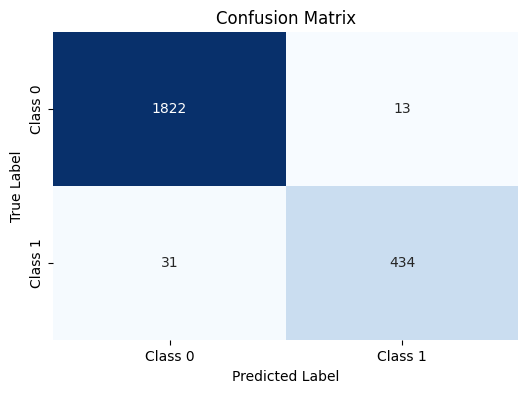

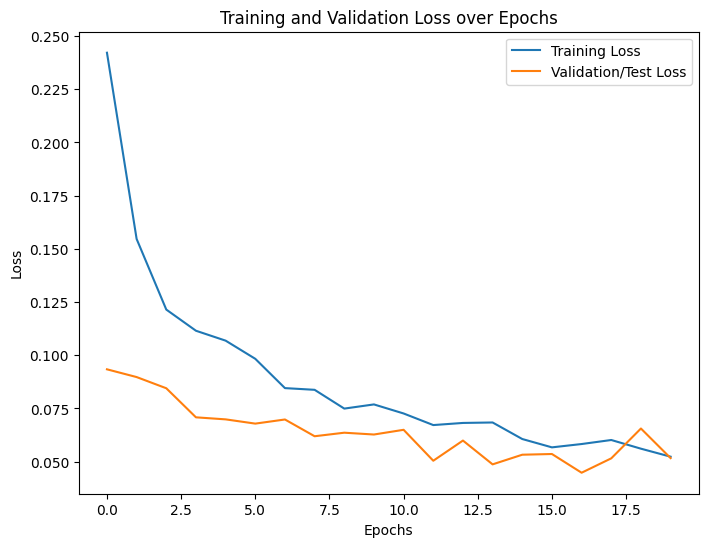

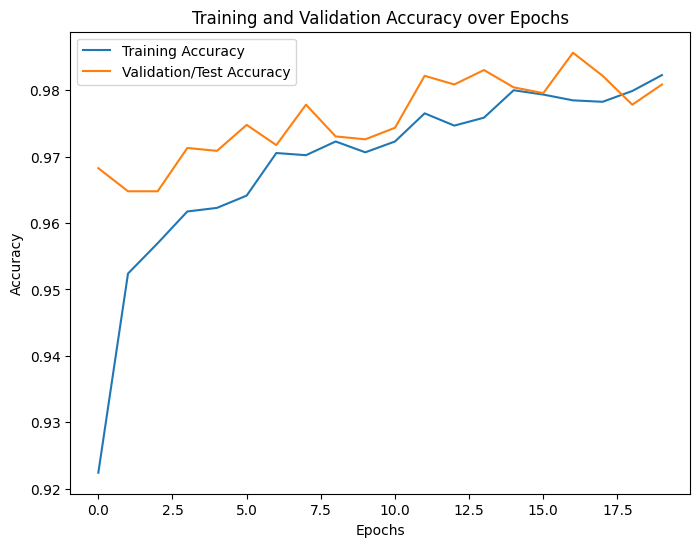

In [22]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predict the test set
y_pred_prob = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Training and Validation Loss Curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize Training and Validation Accuracy Curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation/Test Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model(LSTM)

In [23]:
# Separate features and labels
X = df2.drop('y', axis=1)  # Drop the label column 'y'
y = df2['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Build the LSTM model for binary classification
model = Sequential()

# Reshape the input data to include the timesteps dimension
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Input layer
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))  # Updated input_shape
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Additional LSTM layers
model.add(LSTM(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32))  # Last LSTM layer does not need return_sequences
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Output is 1 neuron with sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │       157,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,937 (859.13 KB)

 Trainable params: 219,489 (857.38 KB)

 Non-trainable params: 448 (1.75 KB)

In [26]:
# Train the model
history= model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6164 - loss: 0.6971 - val_accuracy: 0.7978 - val_loss: 0.4461
Epoch 2/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7910 - loss: 0.4538 - val_accuracy: 0.8396 - val_loss: 0.3718
Epoch 3/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8239 - loss: 0.3941 - val_accuracy: 0.8504 - val_loss: 0.3450
Epoch 4/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8268 - loss: 0.3890 - val_accuracy: 0.8561 - val_loss: 0.3393
Epoch 5/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8461 - loss: 0.3555 - val_accuracy: 0.8552 - val_loss: 0.3314
Epoch 6/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8546 - loss: 0.3477 - val_accuracy: 0.8587 - val_loss: 0.3243
Epoch 7/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8599 - loss: 0.3302 - val_accuracy: 0.8678 - val_loss: 0.3144
Epoch 8/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8676 - loss: 0.3229 - val_accuracy: 0

Train Accuracy: 0.9198
Test Accuracy: 0.8778
Train Loss: 0.2187
Test Loss: 0.3006
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1835
           1       0.74      0.62      0.67       465

    accuracy                           0.88      2300
   macro avg       0.82      0.78      0.80      2300
weighted avg       0.87      0.88      0.87      2300


Confusion Matrix:


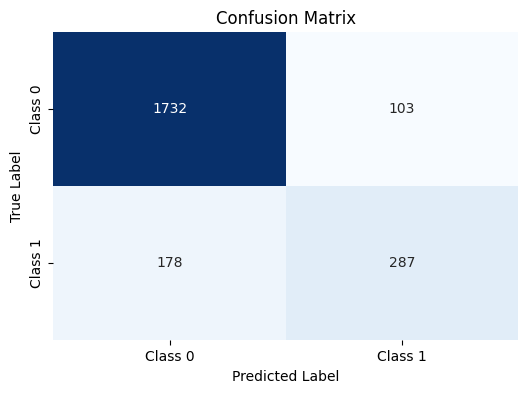

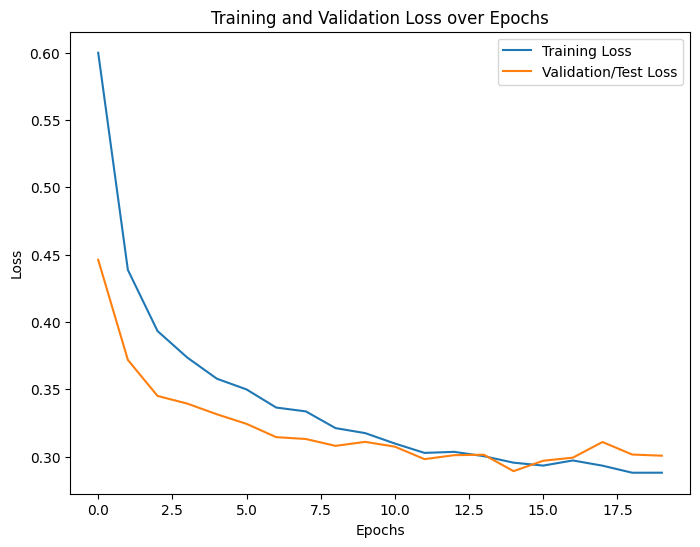

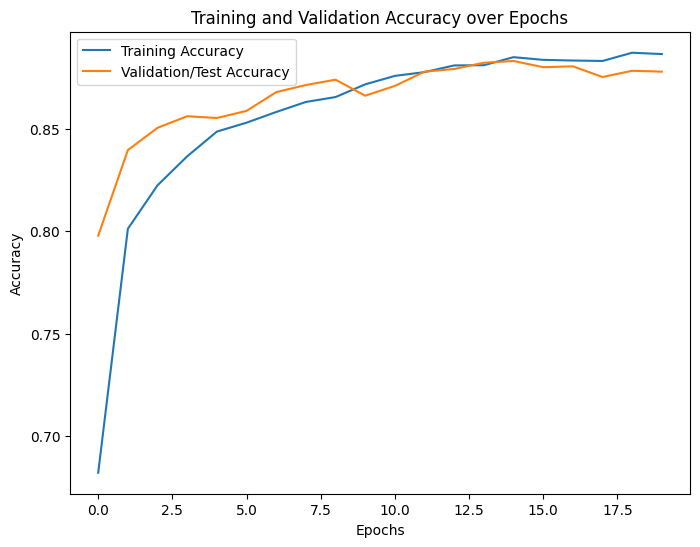

In [27]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predict the test set
y_pred_prob = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Training and Validation Loss Curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize Training and Validation Accuracy Curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation/Test Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## TimeGAN(Class 0)

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
# Load the dataset
data = pd.read_csv(
    r"W:\courses\SIC\assigments&tasks\20-final project\Epileptic Seizure Recognition.csv"
)

# Store the target column separately
target = data['y']

# Drop irrelevant columns
data = data.drop(['Unnamed', 'y'], axis=1)

# Define your mapping dictionary
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}

# Map the target labels using the dictionary
target = target.map(dic)

# Filter the data to keep only rows where the target is class 0
data_class_0 = data[target == 0]

# Optionally, you can also filter the target variable to match
target_class_0 = target[target == 0]

# Print the shape of the filtered data
print(f"Filtered data shape (rows, features): {data_class_0.shape}")
print(f"Filtered target shape (rows): {target_class_0.shape}")

Filtered data shape (rows, features): (9200, 178)
Filtered target shape (rows): (9200,)


In [32]:
def build_embedder():
    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=True),
        layers.TimeDistributed(layers.Dense(50)),
        layers.TimeDistributed(layers.Dense(10))  # Embed to 10 dimensions
    ])
    return model

def build_recovery():
    # Get the number of features from your dataset
    n_features = 178  # data_class_0.shape[1] or the actual number of features

    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=True),
        layers.TimeDistributed(layers.Dense(50)),
        layers.TimeDistributed(layers.Dense(n_features))  # Reconstruct back to original features
    ])
    return model

In [33]:
def build_generator():
    # Get the number of features from your dataset
    n_features = 178  # data_class_0.shape[1]

    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=True),
        layers.TimeDistributed(layers.Dense(50)),
        layers.TimeDistributed(layers.Dense(n_features))  # Generate original features
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100),
        layers.Dense(50),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [34]:
def build_supervisor():
    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=True)
    ])
    return model

In [35]:
def custom_loss(real, generated):
    real = tf.cast(real, tf.float32)
    return tf.reduce_mean(tf.square(real - generated))

# Create the optimizer outside the train_step function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [36]:
@tf.function
def train_step(generator, discriminator, embedder, recovery, supervisor, real_data):
    # Reshape real_data to include a timesteps dimension
    real_data = tf.expand_dims(real_data, axis=1)  # Add timesteps dimension

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Embed real data
        embedded_data = embedder(real_data)
        recovered_data = recovery(embedded_data)

        # Generate fake data
        noise_shape = real_data.shape  # Use the shape of real_data for noise
        noise = tf.random.normal(shape=noise_shape)
        generated_data = generator(noise)

        # Supervised training
        supervised_data = supervisor(embedded_data)

        # Discriminator prediction on real and fake data
        # Cast inputs to discriminator to float32
        real_output = discriminator(tf.cast(real_data, dtype=tf.float32))
        fake_output = discriminator(tf.cast(generated_data, dtype=tf.float32))

        # Losses
        # Reshape recovered_data to match real_data shape for loss calculation
        recovered_data = tf.squeeze(recovered_data, axis=1)
        embedding_loss = custom_loss(real_data, recovered_data)
        # Calculate generator loss based on discriminator output for fake data
        generator_loss = custom_loss(tf.ones_like(fake_output), fake_output)
        # Calculate discriminator loss based on real and fake data
        discriminator_loss_real = custom_loss(tf.ones_like(real_output), real_output)
        discriminator_loss_fake = custom_loss(tf.zeros_like(fake_output), fake_output)
        discriminator_loss = discriminator_loss_real + discriminator_loss_fake

    # Calculate gradients separately for generator and discriminator
    generator_gradients = gen_tape.gradient(generator_loss + embedding_loss, generator.trainable_variables + embedder.trainable_variables + recovery.trainable_variables)
    discriminator_gradients = disc_tape.gradient(discriminator_loss, discriminator.trainable_variables)

    # Apply gradients using the optimizer (now defined outside)
    if generator_gradients and any(g is not None for g in generator_gradients):
        optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables + embedder.trainable_variables + recovery.trainable_variables))
    if discriminator_gradients and any(g is not None for g in discriminator_gradients):
        optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    return embedding_loss, discriminator_loss

In [37]:
# Instantiate the models before the training loop
generator = build_generator()
discriminator = build_discriminator()
embedder = build_embedder()
recovery = build_recovery()
supervisor = build_supervisor()

# Batch processing
batch_size = 32  # Choose an appropriate batch size based on your system's memory capacity
num_batches = data_class_0.shape[0] // batch_size

In [38]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    for batch_index in range(num_batches):
        start_index = batch_index * batch_size
        end_index = (batch_index + 1) * batch_size
        batch_data = data_class_0[start_index:end_index]  # Select a batch of data

        loss_embed, loss_disc = train_step(generator, discriminator, embedder, recovery, supervisor, batch_data)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Embed Loss: {loss_embed.numpy()}, Disc Loss: {loss_disc.numpy()}")

Epoch 0, Embed Loss: 13519.3876953125, Disc Loss: 0.000226935648242943
Epoch 10, Embed Loss: 13519.3876953125, Disc Loss: 8.293027349282056e-07
Epoch 20, Embed Loss: 13519.3876953125, Disc Loss: 1.1416535272701367e-07
Epoch 30, Embed Loss: 13519.3876953125, Disc Loss: 2.2011393596699236e-08
Epoch 40, Embed Loss: 13519.3876953125, Disc Loss: 4.778027751228819e-09
Epoch 50, Embed Loss: 13519.3876953125, Disc Loss: 1.1979156555597115e-09
Epoch 60, Embed Loss: 13519.3876953125, Disc Loss: 3.623869537783264e-10


KeyboardInterrupt: 

In [ ]:
def generate_rows(generator, num_samples, n_features): # Add n_features as an argument
    noise = tf.random.normal(shape=(num_samples, 178, n_features))
    generated_rows = generator(noise)
    return generated_rows

# Generate new rows of data (each row consists of 178 points)
num_samples = 5  # You can generate as many rows as needed
# Get n_features from your data's shape
n_features = data.shape[1]
generated_rows = generate_rows(generator, num_samples, n_features).numpy() # Pass n_features to the function

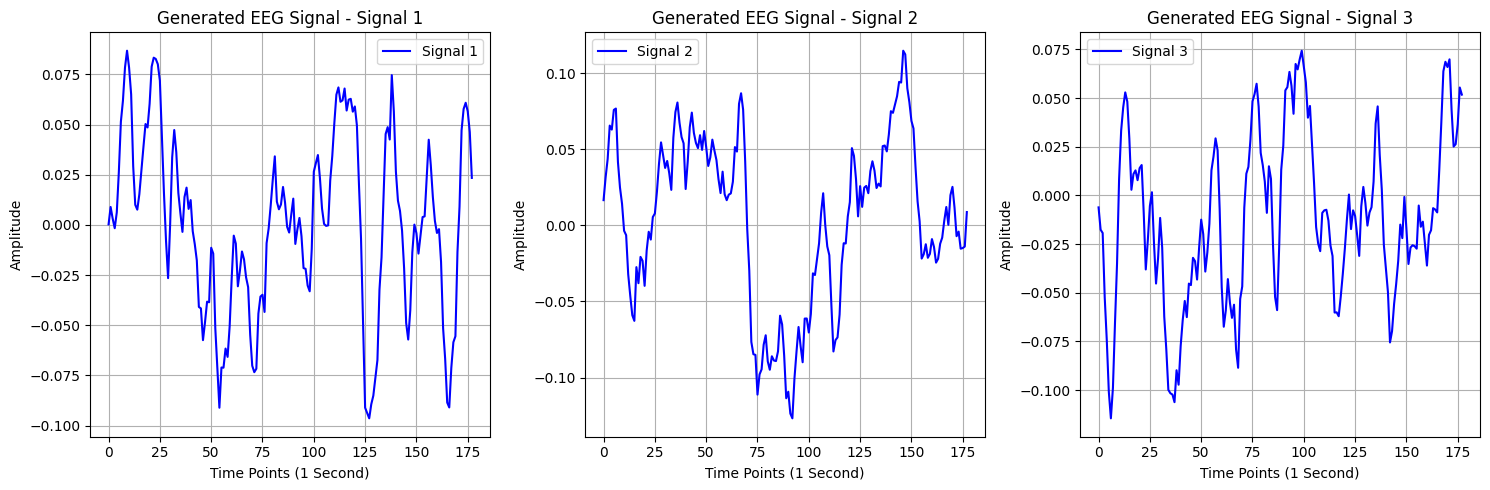

In [ ]:
# Function to plot specific signals side by side
def plot_specific_signals(signals, indices, title_prefix="Generated EEG Signal", sample_idx=0):
    num_signals = len(indices)  # Number of specific signals to plot

    # Create a figure with subplots for the specified signals
    fig, axes = plt.subplots(1, num_signals, figsize=(15, 5))

    for idx, signal_idx in enumerate(indices):  # Iterate over each specified signal index
        axes[idx].plot(signals[sample_idx, :, signal_idx], label=f'Signal {signal_idx+1}', color='blue')
        axes[idx].set_title(f"{title_prefix} - Signal {signal_idx+1}")
        axes[idx].set_xlabel('Time Points (1 Second)')
        axes[idx].set_ylabel('Amplitude')
        axes[idx].legend()
        axes[idx].grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Specify the indices of the three signals you want to plot
specific_indices = [0, 1, 2]  # Indices of the signals to visualize (adjust as needed)

# Visualize the specified signals side by side
plot_specific_signals(generated_rows, specific_indices, title_prefix="Generated EEG Signal", sample_idx=0)

## TimeGAN(Class 1)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Epileptic Seizure Recognition.csv')

# Store the target column separately
target = data['y']

# Drop irrelevant columns
data = data.drop(['Unnamed', 'y'], axis=1)

# Define your mapping dictionary
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}

# Map the target labels using the dictionary
target = target.map(dic)

# Filter the data to keep only rows where the target is class 0
data_class_1 = data[target == 1]

# Optionally, you can also filter the target variable to match
target_class_1 = target[target == 1]

# Print the shape of the filtered data
print(f"Filtered data shape (rows, features): {data_class_1.shape}")
print(f"Filtered target shape (rows): {target_class_1.shape}")

Filtered data shape (rows, features): (2300, 178)
Filtered target shape (rows): (2300,)


In [ ]:
def build_embedder():
    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=True),
        layers.TimeDistributed(layers.Dense(50)),
        layers.TimeDistributed(layers.Dense(10))  # Embed to 10 dimensions
    ])
    return model

def build_recovery():
    # Get the number of features from your dataset
    n_features = 178  # data_class_0.shape[1] or the actual number of features

    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=True),
        layers.TimeDistributed(layers.Dense(50)),
        layers.TimeDistributed(layers.Dense(n_features))  # Reconstruct back to original features
    ])
    return model

In [ ]:
def build_generator():
    # Get the number of features from your dataset
    n_features = 178  # data_class_0.shape[1]

    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=True),
        layers.TimeDistributed(layers.Dense(50)),
        layers.TimeDistributed(layers.Dense(n_features))  # Generate original features
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100),
        layers.Dense(50),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
def build_supervisor():
    model = tf.keras.Sequential([
        layers.LSTM(100, return_sequences=True),
        layers.LSTM(100, return_sequences=True)
    ])
    return model

In [ ]:
def custom_loss(real, generated):
    real = tf.cast(real, tf.float32)
    return tf.reduce_mean(tf.square(real - generated))

# Create the optimizer outside the train_step function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
@tf.function
def train_step(generator, discriminator, embedder, recovery, supervisor, real_data):
    # Reshape real_data to include a timesteps dimension
    real_data = tf.expand_dims(real_data, axis=1)  # Add timesteps dimension

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Embed real data
        embedded_data = embedder(real_data)
        recovered_data = recovery(embedded_data)

        # Generate fake data
        noise_shape = real_data.shape  # Use the shape of real_data for noise
        noise = tf.random.normal(shape=noise_shape)
        generated_data = generator(noise)

        # Supervised training
        supervised_data = supervisor(embedded_data)

        # Discriminator prediction on real and fake data
        # Cast inputs to discriminator to float32
        real_output = discriminator(tf.cast(real_data, dtype=tf.float32))
        fake_output = discriminator(tf.cast(generated_data, dtype=tf.float32))

        # Losses
        # Reshape recovered_data to match real_data shape for loss calculation
        recovered_data = tf.squeeze(recovered_data, axis=1)
        embedding_loss = custom_loss(real_data, recovered_data)
        # Calculate generator loss based on discriminator output for fake data
        generator_loss = custom_loss(tf.ones_like(fake_output), fake_output)
        # Calculate discriminator loss based on real and fake data
        discriminator_loss_real = custom_loss(tf.ones_like(real_output), real_output)
        discriminator_loss_fake = custom_loss(tf.zeros_like(fake_output), fake_output)
        discriminator_loss = discriminator_loss_real + discriminator_loss_fake

    # Calculate gradients separately for generator and discriminator
    generator_gradients = gen_tape.gradient(generator_loss + embedding_loss, generator.trainable_variables + embedder.trainable_variables + recovery.trainable_variables)
    discriminator_gradients = disc_tape.gradient(discriminator_loss, discriminator.trainable_variables)

    # Apply gradients using the optimizer (now defined outside)
    if generator_gradients and any(g is not None for g in generator_gradients):
        optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables + embedder.trainable_variables + recovery.trainable_variables))
    if discriminator_gradients and any(g is not None for g in discriminator_gradients):
        optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    return embedding_loss, discriminator_loss

In [ ]:
# Instantiate the models before the training loop
generator = build_generator()
discriminator = build_discriminator()
embedder = build_embedder()
recovery = build_recovery()
supervisor = build_supervisor()

# Batch processing
batch_size = 32  # Choose an appropriate batch size based on your system's memory capacity
num_batches = data_class_1.shape[0] // batch_size

In [ ]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    for batch_index in range(num_batches):
        start_index = batch_index * batch_size
        end_index = (batch_index + 1) * batch_size
        batch_data = data_class_1[start_index:end_index]  # Select a batch of data

        loss_embed, loss_disc = train_step(generator, discriminator, embedder, recovery, supervisor, batch_data)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Embed Loss: {loss_embed.numpy()}, Disc Loss: {loss_disc.numpy()}")

Epoch 0, Embed Loss: 99672.40625, Disc Loss: 0.04584339261054993
Epoch 10, Embed Loss: 99672.40625, Disc Loss: 2.456998663546983e-05
Epoch 20, Embed Loss: 99672.40625, Disc Loss: 5.038729796069674e-06
Epoch 30, Embed Loss: 99672.40625, Disc Loss: 2.0914903871016577e-06
Epoch 40, Embed Loss: 99672.40625, Disc Loss: 1.0519964916966273e-06
Epoch 50, Embed Loss: 99672.40625, Disc Loss: 6.293175829341635e-07
Epoch 60, Embed Loss: 99672.40625, Disc Loss: 3.8594740203734546e-07
Epoch 70, Embed Loss: 99672.40625, Disc Loss: 2.3699604412286135e-07
Epoch 80, Embed Loss: 99672.40625, Disc Loss: 1.583446191943949e-07
Epoch 90, Embed Loss: 99672.40625, Disc Loss: 1.004546987815047e-07
Epoch 100, Embed Loss: 99672.40625, Disc Loss: 6.946159913923111e-08
Epoch 110, Embed Loss: 99672.40625, Disc Loss: 4.7596017793694045e-08
Epoch 120, Embed Loss: 99672.40625, Disc Loss: 3.151371075205134e-08
Epoch 130, Embed Loss: 99672.40625, Disc Loss: 2.2202581106967045e-08
Epoch 140, Embed Loss: 99672.40625, Disc 

In [ ]:
def generate_rows(generator, num_samples, n_features): # Add n_features as an argument
    noise = tf.random.normal(shape=(num_samples, 178, n_features))
    generated_rows = generator(noise)
    return generated_rows

# Generate new rows of data (each row consists of 178 points)
num_samples = 5  # You can generate as many rows as needed
# Get n_features from your data's shape
n_features = data.shape[1]
generated_rows = generate_rows(generator, num_samples, n_features).numpy() # Pass n_features to the function

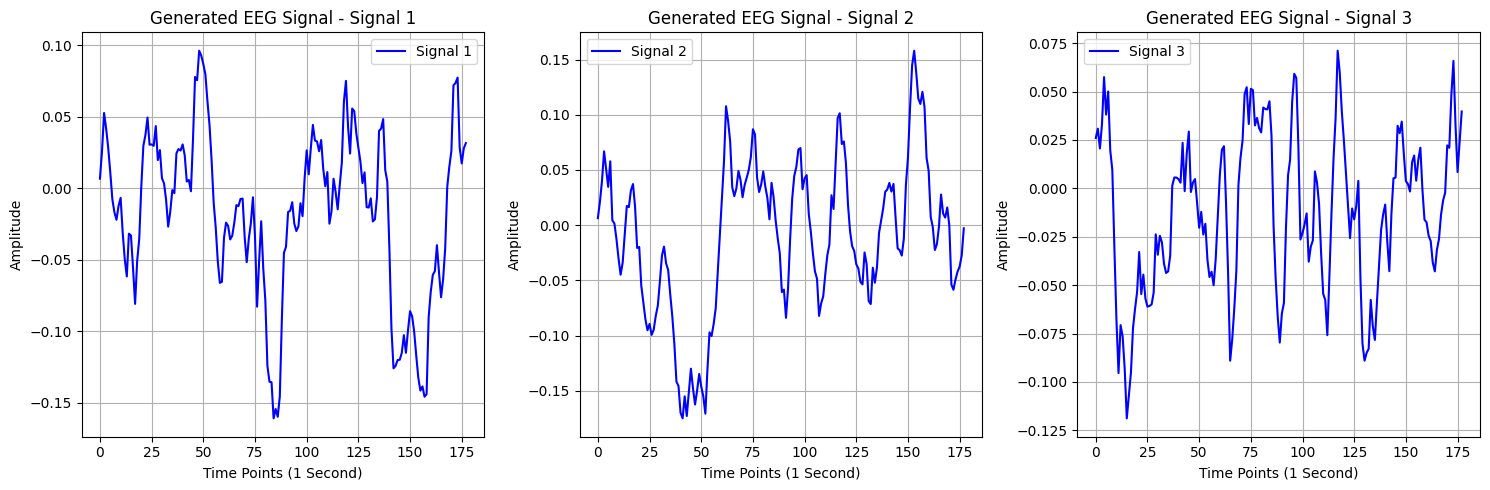

In [ ]:
# Function to plot specific signals side by side
def plot_specific_signals(signals, indices, title_prefix="Generated EEG Signal", sample_idx=0):
    num_signals = len(indices)  # Number of specific signals to plot

    # Create a figure with subplots for the specified signals
    fig, axes = plt.subplots(1, num_signals, figsize=(15, 5))

    for idx, signal_idx in enumerate(indices):  # Iterate over each specified signal index
        axes[idx].plot(signals[sample_idx, :, signal_idx], label=f'Signal {signal_idx+1}', color='blue')
        axes[idx].set_title(f"{title_prefix} - Signal {signal_idx+1}")
        axes[idx].set_xlabel('Time Points (1 Second)')
        axes[idx].set_ylabel('Amplitude')
        axes[idx].legend()
        axes[idx].grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Specify the indices of the three signals you want to plot
specific_indices = [0, 1, 2]  # Indices of the signals to visualize (adjust as needed)

# Visualize the specified signals side by side
plot_specific_signals(generated_rows, specific_indices, title_prefix="Generated EEG Signal", sample_idx=0)

## Thank you